# Confidence interval with python
Source: 
https://datos.estadisticas.pr/dataset/nacimientos/resource/13db5e86-35d6-4105-8c84-33c353b5b43d?inner_span=True

In [18]:
import pandas as pd
from pandas import read_csv
datosNB = pd.read_csv('Documents/Canal Yout/Stats with Python/birth2011.csv',sep=',')
datosNB.head()

,DOB_MM,DOB_WK,OCNTY,MAGER,MRCNTY,FAGECOMB,DWGT,DMETH_REC,APGAR5,SEX,COMBGEST,DBWT
0,1,7,127,24,999,25.0,160,1,9,M,38,3090
1,1,7,25,19,25,21.0,143,1,9,F,39,3062
2,1,1,999,25,999,45.0,172,1,10,F,39,3062
3,1,3,25,38,25,32.0,192,2,9,F,39,3062
4,1,2,999,23,999,25.0,194,1,9,M,39,3941


In [19]:
len(datosNB)

40401

# Choose groups to compare

In [20]:
df1 = datosNB.DBWT[datosNB.SEX=='M']
df2 = datosNB.DBWT[datosNB.SEX=='F']

# BoxPlot :  Gender comparison

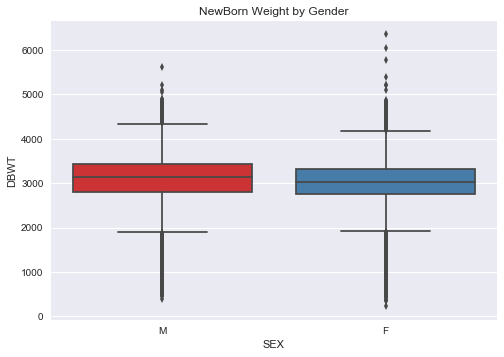

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.boxplot(x="SEX", y="DBWT", data=datosNB, palette="Set1")
plt.title('NewBorn Weight by Gender')

In [22]:
n1 = len(df1)
n2 = len(df2)
m1 = df1.mean()
m2 = df2.mean()
std1 = df1.std()
std2 = df2.std()

print("1st group")
print( "n1: ",n1)
print( "m1: ",m1)
print( "std1: ",std1)

print(" 2nd sample group")
print( "n2: ",n2)
print( "m2: ",m2)
print( "std2: ",std2)

1st group
n1:  20622
m1:  3102.2151100766173
std1:  542.3770821728682
 2nd sample group
n2:  19779
m2:  3006.0941402497597
std2:  517.2635718140251


# Formula Confidence interval

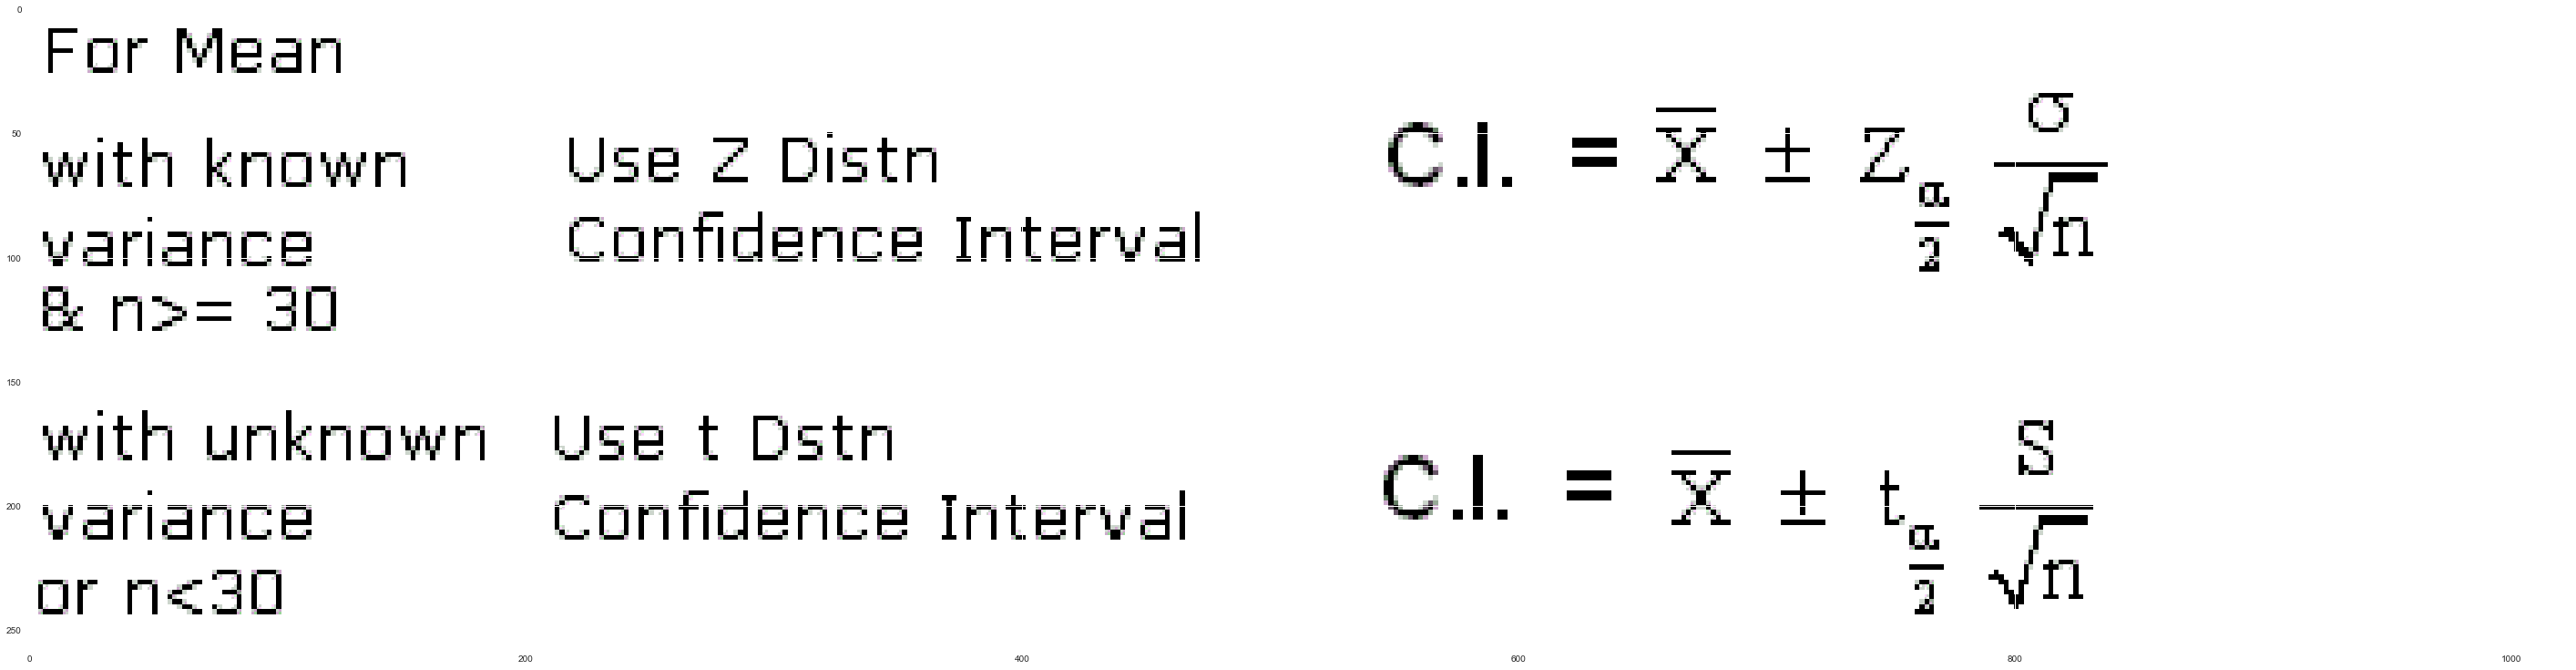

In [23]:
import matplotlib.image as mpimg
img = mpimg.imread('Documents/Canal Yout/Stats with Python/CIformula.jpg')
plt.figure(figsize=(50,50))
plt.imshow(img)
plt.show()

In [24]:
confidence = 0.95

from scipy import stats
import math
h1 = std1 /math.sqrt(n1)  * stats.t.ppf((1 + confidence) / 2, n1 - 1) 
h2 = std2 /math.sqrt(n2) * stats.t.ppf((1 + confidence) / 2, n2 - 1)


In [25]:
print("DBWT  CI-Male: ", m1 - h1,m1+h1)
print("DBWT  CI-Female: ", m2 - h2,m2+h2)

DBWT  CI-Male:  3094.81207986 3109.61814029
DBWT  CI-Female:  2998.88498466 3013.30329584


In [26]:
tprueba,pvalue =stats.ttest_ind(df1,df2, equal_var=False)
print("Tprueba: ",tprueba)
print(pvalue)

Tprueba:  18.232819996
5.61648650268e-74


# function for calculate confidence interval

In [27]:
def CI(df, confidence = 0.95):
  n = len(df)
  m = df.mean()
  std = df.std()
  h = std / math.sqrt(n)  * stats.t.ppf((1 + confidence) / 2, n - 1)
  print("CI: ", m - h,m + h)
  return;

In [28]:
CI( df1)

CI:  3094.81207986 3109.61814029


In [29]:
CI(df2)

CI:  2998.88498466 3013.30329584
